# CAPSTONE PROJECT

In [554]:
import pandas as pd
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.subplots as sp
import ipywidgets as widgets
import plotly.graph_objs as go
import IPython.display as disp
import matplotlib.pyplot as plt
from ipywidgets import interact
from pandas.api.types import CategoricalDtype

In [555]:
COL_NAME_HTL = 'Hotel'
COL_NAME_LEAD_TIME = 'Lead Time'
COL_NAME_ARR_DATE_D = 'Arrival Date Day'
COL_NAME_ARR_DATE_M = 'Arrival Date Month'
COL_NAME_ARR_DATE_Y = 'Arrival Date Year'
COL_NAME_ARR_DATE = 'Arrival Date'
COL_NAME_ADT = 'Adults'
COL_NAME_CHLDN = 'Children'
COL_NAME_CNTRY = 'Country'
COL_NAME_MKT_SEG = 'Market Segment'
COL_NAME_AGT = 'Agent'
COL_NAME_CUST_TYPE = 'Customer Type'
COL_NAME_AVG_DLY_RATE = 'Average Daily Rate'
COL_NAME_CNTRY_NAME = 'Country Name'

In [556]:
month_ord = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_ord_sort = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

In [557]:
df = pd.read_csv('data_valid.csv')

cntry_codes_df = pd.read_excel('country_codes_list.xlsx')

merged_df = pd.merge(df, cntry_codes_df, on=COL_NAME_CNTRY, how='left')

In [558]:
# Create dropdown list
def crt_ddl(col_name, desc):
    list = df[col_name].unique().tolist()
    list.append('All')
    return widgets.Dropdown(
        options=list,
        value='All',
        description=f'{desc}: ',
        style={'description_width': 'initial'},
        layout={'width': '15%', 'margin': '0 auto'})

In [559]:
# Univariate Hotel
def uv_htl(year, mkt_seg, cust_type):
    if year == 'All':
        fltr_df = df
    else:
        fltr_df = df[df[COL_NAME_ARR_DATE_Y] == year]
    if mkt_seg == 'All':
        fltr_df = fltr_df
    else:
        fltr_df = fltr_df[fltr_df[COL_NAME_MKT_SEG] == mkt_seg]
    if cust_type == 'All':
        fltr_df = fltr_df
    else:
        fltr_df = fltr_df[fltr_df[COL_NAME_CUST_TYPE] == cust_type]
    cnts = fltr_df[COL_NAME_HTL].value_counts()
    return go.Pie(labels=cnts.index, values=cnts.values, hole=.5, name='Hotel')

In [560]:
# Univariate Lead Time
def uv_lead_time(year, mkt_seg, cust_type):
    if year == 'All':
        fltr_df = df
    else:
        fltr_df = df[df[COL_NAME_ARR_DATE_Y] == year]
    if mkt_seg == 'All':
        fltr_df = fltr_df
    else:
        fltr_df = fltr_df[fltr_df[COL_NAME_MKT_SEG] == mkt_seg]
    if cust_type == 'All':
        fltr_df = fltr_df
    else:
        fltr_df = fltr_df[fltr_df[COL_NAME_CUST_TYPE] == cust_type]
    return go.Histogram(x=fltr_df[COL_NAME_LEAD_TIME], nbinsx=30, name='Day')

In [561]:
# Univariate Arrival Date Day
def uv_arr_date_day(year, mkt_seg, cust_type):
    if year == 'All':
        fltr_df = df
    else:
        fltr_df = df[df[COL_NAME_ARR_DATE_Y] == year]
    if mkt_seg == 'All':
        fltr_df = fltr_df
    else:
        fltr_df = fltr_df[fltr_df[COL_NAME_MKT_SEG] == mkt_seg]
    if cust_type == 'All':
        fltr_df = fltr_df
    else:
        fltr_df = fltr_df[fltr_df[COL_NAME_CUST_TYPE] == cust_type]
    cnts = fltr_df[COL_NAME_ARR_DATE_D].value_counts().sort_index()
    return go.Bar(x=cnts.index, y=cnts.values, name='Day')

In [562]:
# Univariate Arrival Date Month
def uv_arr_date_month(year, mkt_seg, cust_type):
    if year == 'All':
        fltr_df = df
    else:
        fltr_df = df[df[COL_NAME_ARR_DATE_Y] == year]
    if mkt_seg == 'All':
        fltr_df = fltr_df
    else:
        fltr_df = fltr_df[fltr_df[COL_NAME_MKT_SEG] == mkt_seg]
    if cust_type == 'All':
        fltr_df = fltr_df
    else:
        fltr_df = fltr_df[fltr_df[COL_NAME_CUST_TYPE] == cust_type]
    cnts = fltr_df[COL_NAME_ARR_DATE_M].astype(CategoricalDtype(categories=month_ord, ordered=True)).value_counts().sort_index()
    return go.Bar(x=cnts.index.str[:3], y=cnts.values, hovertext=month_ord, name='Month')

In [563]:
# Univariate Arrival Date Year
def uv_arr_date_year(year, mkt_seg, cust_type):
    if year == 'All':
        fltr_df = df
    else:
        fltr_df = df[df[COL_NAME_ARR_DATE_Y] == year]
    if mkt_seg == 'All':
        fltr_df = fltr_df
    else:
        fltr_df = fltr_df[fltr_df[COL_NAME_MKT_SEG] == mkt_seg]
    if cust_type == 'All':
        fltr_df = fltr_df
    else:
        fltr_df = fltr_df[fltr_df[COL_NAME_CUST_TYPE] == cust_type]
    cnts = fltr_df[COL_NAME_ARR_DATE_Y].value_counts().sort_index()
    return go.Pie(labels=cnts.index, values=cnts.values, hole=.5, name='Year')

In [564]:
# Univariate Country
def uv_cntry(year, mkt_seg, cust_type):
    if year == 'All':
        fltr_df = df
    else:
        fltr_df = df[df[COL_NAME_ARR_DATE_Y] == year]
    if mkt_seg == 'All':
        fltr_df = fltr_df
    else:
        fltr_df = fltr_df[fltr_df[COL_NAME_MKT_SEG] == mkt_seg]
    if cust_type == 'All':
        fltr_df = fltr_df
    else:
        fltr_df = fltr_df[fltr_df[COL_NAME_CUST_TYPE] == cust_type]
    new_df = pd.merge(cntry_codes_df, fltr_df.groupby([COL_NAME_CNTRY]).size().reset_index(name='Count'), how='inner')
    return go.Choropleth(locations=new_df[COL_NAME_CNTRY], z=new_df['Count'], hovertext=new_df[COL_NAME_CNTRY_NAME], colorscale='reds', showscale=False, name=COL_NAME_CNTRY)

In [565]:
# Univariate Adults
def uv_adt(year, mkt_seg, cust_type):
    if year == 'All':
        fltr_df = df
    else:
        fltr_df = df[df[COL_NAME_ARR_DATE_Y] == year]
    if mkt_seg == 'All':
        fltr_df = fltr_df
    else:
        fltr_df = fltr_df[fltr_df[COL_NAME_MKT_SEG] == mkt_seg]
    if cust_type == 'All':
        fltr_df = fltr_df
    else:
        fltr_df = fltr_df[fltr_df[COL_NAME_CUST_TYPE] == cust_type]
    cnts = fltr_df[COL_NAME_ADT].value_counts().sort_index()
    return go.Pie(labels=cnts.index, values=cnts.values, hole=.5, rotation=315, name='N.O. Adults')

In [566]:
# Univariate Children
def uv_chldn(year, mkt_seg, cust_type):
    if year == 'All':
        fltr_df = df
    else:
        fltr_df = df[df[COL_NAME_ARR_DATE_Y] == year]
    if mkt_seg == 'All':
        fltr_df = fltr_df
    else:
        fltr_df = fltr_df[fltr_df[COL_NAME_MKT_SEG] == mkt_seg]
    if cust_type == 'All':
        fltr_df = fltr_df
    else:
        fltr_df = fltr_df[fltr_df[COL_NAME_CUST_TYPE] == cust_type]
    cnts = fltr_df[COL_NAME_CHLDN].value_counts().sort_index()
    return go.Pie(labels=cnts.index, values=cnts.values, hole=.5, rotation=270, name='N.O. Children')

In [567]:
# Univariate Market Segment
def uv_mrk_seg(year, mkt_seg, cust_type):
    if year == 'All':
        fltr_df = df
    else:
        fltr_df = df[df[COL_NAME_ARR_DATE_Y] == year]
    if mkt_seg == 'All':
        fltr_df = fltr_df
    else:
        fltr_df = fltr_df[fltr_df[COL_NAME_MKT_SEG] == mkt_seg]
    if cust_type == 'All':
        fltr_df = fltr_df
    else:
        fltr_df = fltr_df[fltr_df[COL_NAME_CUST_TYPE] == cust_type]
    cnts = fltr_df[COL_NAME_MKT_SEG].value_counts().sort_index()
    return go.Pie(labels=cnts.index, values=cnts.values, hole=.5, rotation=315, name='Name')

In [568]:
# Univariate Agent
def uv_agt(year, mkt_seg, cust_type):
    if year == 'All':
        fltr_df = df
    else:
        fltr_df = df[df[COL_NAME_ARR_DATE_Y] == year]
    if mkt_seg == 'All':
        fltr_df = fltr_df
    else:
        fltr_df = fltr_df[fltr_df[COL_NAME_MKT_SEG] == mkt_seg]
    if cust_type == 'All':
        fltr_df = fltr_df
    else:
        fltr_df = fltr_df[fltr_df[COL_NAME_CUST_TYPE] == cust_type]
    return go.Histogram(x=fltr_df[COL_NAME_AGT], name='ID')

In [569]:
# Univariate Customer Type
def uv_cust_type(year, mkt_seg, cust_type):
    if year == 'All':
        fltr_df = df
    else:
        fltr_df = df[df[COL_NAME_ARR_DATE_Y] == year]
    if mkt_seg == 'All':
        fltr_df = fltr_df
    else:
        fltr_df = fltr_df[fltr_df[COL_NAME_MKT_SEG] == mkt_seg]
    if cust_type == 'All':
        fltr_df = fltr_df
    else:
        fltr_df = fltr_df[fltr_df[COL_NAME_CUST_TYPE] == cust_type]
    cnts = fltr_df[COL_NAME_CUST_TYPE].value_counts().sort_index()
    return go.Pie(labels=cnts.index, values=cnts.values, hole=.5, rotation=270, name='Type')

In [570]:
# Average Daily Rate
def uv_avg_dly_rate(year, mkt_seg, cust_type):
    if year == 'All':
        fltr_df = df
    else:
        fltr_df = df[df[COL_NAME_ARR_DATE_Y] == year]
    if mkt_seg == 'All':
        fltr_df = fltr_df
    else:
        fltr_df = fltr_df[fltr_df[COL_NAME_MKT_SEG] == mkt_seg]
    if cust_type == 'All':
        fltr_df = fltr_df
    else:
        fltr_df = fltr_df[fltr_df[COL_NAME_CUST_TYPE] == cust_type]
    return go.Histogram(x=fltr_df[COL_NAME_AVG_DLY_RATE], nbinsx=50, name='USD')

In [571]:
# Univariate dashboard
def uv_db(year='All', mkt_seg='All', cust_type='All'):
    figs = sp.make_subplots(rows=7, cols=4,
                            specs=[[{'type': 'pie', 'rowspan': 2, 'colspan': 1}, {'type': 'pie'}, {}, {}],
                                   [None, {'type': 'pie'}, {}, {'type': 'pie'}],
                                   [{}, {}, {'type': 'pie'}, {'type': 'pie'}],
                                   [{'type': 'choropleth', 'rowspan': 4, 'colspan': 4}, None, None, {'type': 'pie'}],
                                   [None, None, None, None],
                                   [None, None, None, None],
                                   [None, None, None, None]],
                            subplot_titles=[COL_NAME_HTL, COL_NAME_ADT, COL_NAME_ARR_DATE_D, COL_NAME_LEAD_TIME,
                                            COL_NAME_CHLDN, COL_NAME_ARR_DATE_M, COL_NAME_MKT_SEG,
                                            COL_NAME_AVG_DLY_RATE, COL_NAME_AGT, COL_NAME_ARR_DATE_Y, COL_NAME_CUST_TYPE,
                                            COL_NAME_CNTRY])
    figs.add_trace(uv_htl(year, mkt_seg, cust_type), row=1, col=1)
    figs.add_trace(uv_adt(year, mkt_seg, cust_type), row=1, col=2)
    figs.add_trace(uv_arr_date_day(year, mkt_seg, cust_type), row=1, col=3)
    figs.add_trace(uv_lead_time(year, mkt_seg, cust_type), row=1, col=4)
    figs.add_trace(uv_chldn(year, mkt_seg, cust_type), row=2, col=2)
    figs.add_trace(uv_arr_date_month(year, mkt_seg, cust_type), row=2, col=3)
    figs.add_trace(uv_mrk_seg(year, mkt_seg, cust_type), row=2, col=4)
    figs.add_trace(uv_avg_dly_rate(year, mkt_seg, cust_type), row=3, col=1)
    figs.add_trace(uv_agt(year, mkt_seg, cust_type), row=3, col=2)
    figs.add_trace(uv_arr_date_year(year, mkt_seg, cust_type), row=3, col=3)
    figs.add_trace(uv_cust_type(year, mkt_seg, cust_type), row=3, col=4)
    figs.add_trace(uv_cntry(year, mkt_seg, cust_type), row=4, col=1)
    figs.update_layout(height=1024, title_text=f'EDA Univariate Analysis for Portugal Hotel Booking in {year}', showlegend=False)#, xaxis3=dict(tickangle=-90))
    figs.show()

In [572]:
uv_year_ddl = crt_ddl(COL_NAME_ARR_DATE_Y, 'Year')
uv_mkt_seg_ddl = crt_ddl(COL_NAME_MKT_SEG, COL_NAME_MKT_SEG)
uv_cust_type_ddl = crt_ddl(COL_NAME_CUST_TYPE, COL_NAME_CUST_TYPE)

In [573]:
interactive_db = widgets.interactive(uv_db, year=uv_year_ddl, mkt_seg=uv_mkt_seg_ddl, cust_type=uv_cust_type_ddl)
display(interactive_db)

interactive(children=(Dropdown(description='Year: ', index=3, layout=Layout(margin='0 auto', width='15%'), opt…

In [574]:
# Multivariate Hotel & Lead Time
def mv_htl_lead_time(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    sns.kdeplot(data=df_filtered, x=COL_NAME_LEAD_TIME, hue=COL_NAME_HTL, fill=True, palette=list(reversed(sns.color_palette('Set2', n_colors=len(df[COL_NAME_HTL].unique())))))
    plt.title(f'Kernel density estimation of {COL_NAME_LEAD_TIME} and {COL_NAME_HTL} by {desc} ({obj})')
    plt.grid(alpha=.3)
    plt.show()

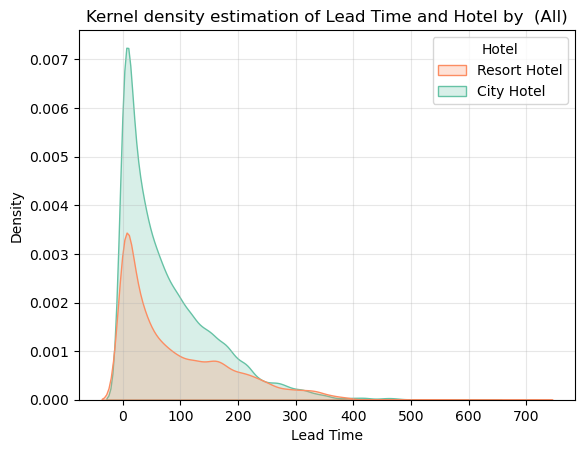

In [575]:
mv_htl_lead_time('All','','')

In [576]:
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objs as go
# Multivariate Hotel & Arrival Date Day
def mv_htl_arr_date_day(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    df_grouped = df_filtered.groupby([COL_NAME_HTL, COL_NAME_ARR_DATE_D]).size().reset_index(name='Booking Count')
    fig = sp.make_subplots(rows=1, cols=1, subplot_titles=[f'Line plot of booking count of {COL_NAME_HTL} and {COL_NAME_ARR_DATE_D} by {desc} ({obj})'])
    for htl in df_grouped[COL_NAME_HTL].unique():
        df_htl = df_grouped[df_grouped[COL_NAME_HTL] == htl]
        fig.add_trace(go.Scatter(x=df_htl[COL_NAME_ARR_DATE_D], y=df_htl['Booking Count'], mode='lines', name=htl), row=1, col=1)
    fig.update_layout(title='Booking count by hotel and arrival date', xaxis_title=COL_NAME_ARR_DATE_D, yaxis_title='Booking Count')
    fig.show()

In [577]:
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objs as go
# Multivariate Hotel & Arrival Date Month
def mv_htl_arr_date_month(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    htl_month_df = df_filtered.groupby([COL_NAME_HTL, COL_NAME_ARR_DATE_M]).size().reset_index(name='Booking Count')
    htl_month_df[COL_NAME_ARR_DATE_M] = pd.Categorical(htl_month_df[COL_NAME_ARR_DATE_M], categories=month_ord, ordered=True)
    htl_month_df = htl_month_df.sort_values([COL_NAME_ARR_DATE_M])
    fig = sp.make_subplots(rows=1, cols=1, subplot_titles=[f'Line plot of {COL_NAME_HTL} and {COL_NAME_ARR_DATE_M} by {desc} ({obj})'])
    for htl in htl_month_df[COL_NAME_HTL].unique():
        df_htl = htl_month_df[htl_month_df[COL_NAME_HTL] == htl]
        fig.add_trace(go.Scatter(x=df_htl[COL_NAME_ARR_DATE_M], y=df_htl['Booking Count'], mode='lines', name=htl), row=1, col=1)
    fig.update_layout(title='Booking count by hotel and arrival month', xaxis_title=COL_NAME_ARR_DATE_M, yaxis_title='Booking Count')
    fig.show()


In [578]:
import plotly.express as px
# Multivariate Hotel & Arrival Date Year
def mv_htl_arr_date_year(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    year_df = df_filtered.groupby([COL_NAME_HTL, COL_NAME_ARR_DATE_Y]).size().reset_index(name='Booking Count')
    year_df[COL_NAME_ARR_DATE_Y] = year_df[COL_NAME_ARR_DATE_Y].astype(str)
    sns.catplot(x=COL_NAME_ARR_DATE_Y,
                y='Booking Count',
                hue=COL_NAME_HTL,
                data=year_df,
                kind='bar',
                palette='Set2')
    plt.title(f'Booking count of {COL_NAME_HTL} and {COL_NAME_ARR_DATE_Y} by {desc} ({obj})')
    plt.grid(alpha=.3)
    plt.show()

In [579]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Multivariate Hotel & guest
def mv_htl_guest(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    
    children_df = df_filtered.groupby([COL_NAME_HTL])[COL_NAME_CHLDN].sum().reset_index(name=f'Total {COL_NAME_CHLDN}')
    adults_df = df_filtered.groupby([COL_NAME_HTL])[COL_NAME_ADT].sum().reset_index(name=f'Total {COL_NAME_ADT}')
    
    # Tạo subplot
    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
    fig.add_trace(go.Pie(values=children_df[f'Total {COL_NAME_CHLDN}'], 
                     labels=children_df[COL_NAME_HTL], 
                     name=COL_NAME_CHLDN, 
                     hole=.4,
                    texttemplate='     %{percent:.1%}     ',
                     marker=dict(line=dict(color='#ffffff', width=1))), 1, 1)
    
    fig.add_trace(go.Pie(values=adults_df[f'Total {COL_NAME_ADT}'], 
                     labels=adults_df[COL_NAME_HTL], 
                     name=COL_NAME_ADT, 
                     hole=.7,
                     texttemplate='%{percent:.1%}',
                     marker=dict(line=dict(color='#ffffff', width=1))), 1, 1)
    
    # Hiển thị biểu đồ
    fig.show()

In [584]:
# Multivariate Hotel & Country
def mv_htl_cntry(obj, col_name, desc):
    if obj == 'All':
        df_filtered = merged_df
    else:
        df_filtered = merged_df[merged_df[col_name] == obj]
    top_10_countries = df_filtered.groupby(COL_NAME_CNTRY_NAME).size().sort_values(ascending=False).head(10).index
    
    booking_count = df_filtered.groupby([COL_NAME_HTL, COL_NAME_CNTRY_NAME]).size().reset_index(name='Booking Count')

    df_htl_top = booking_count[booking_count[COL_NAME_CNTRY_NAME].isin(top_10_countries)]
    
    fig = px.bar(df_htl_top, x=COL_NAME_CNTRY_NAME, y='Booking Count', color=COL_NAME_HTL,
                 category_orders={COL_NAME_CNTRY_NAME: top_10_countries},
                 title=f'Top 10 Countries by booking count for each {COL_NAME_HTL} by {desc} ({obj})')
    fig.update_layout(xaxis_title=COL_NAME_CNTRY_NAME, yaxis_title='Booking Count')

    fig.show()


In [ ]:
# Multivariate Hotel & Market Segment
def mv_htl_mkt_seg(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    
    groupby_df = df_filtered.groupby([COL_NAME_HTL, COL_NAME_MKT_SEG]).size().reset_index(name='Booking Count')
    groupby_df = groupby_df.pivot(index=COL_NAME_MKT_SEG, columns=COL_NAME_HTL, values='Booking Count')
    groupby_df = groupby_df.reindex(groupby_df.sum(axis=1).sort_values(ascending=False).index)
    groupby_df = groupby_df.stack().reset_index().rename(columns={0: 'Booking Count'})

    fig = px.bar(groupby_df, x=COL_NAME_MKT_SEG, y='Booking Count', color=COL_NAME_HTL,
                 title=f'Booking count of {COL_NAME_HTL} and {COL_NAME_MKT_SEG} by {desc} ({obj})',
                 category_orders={COL_NAME_MKT_SEG: groupby_df[COL_NAME_MKT_SEG].unique()})

    fig.update_layout(xaxis_title=COL_NAME_MKT_SEG,
                      yaxis_title='Booking Count')

    fig.show()


In [ ]:
import plotly.express as px
# Multivariate Hotel & Agent
def mv_htl_agt(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df.loc[df[col_name] == obj]
    df_filtered[COL_NAME_AGT] = df_filtered[COL_NAME_AGT].astype(str)
    top_10_agent = df_filtered.groupby(COL_NAME_AGT).size().sort_values(ascending=False).head(10).index
    
    try:
        booking_count = df_filtered.groupby([COL_NAME_HTL, COL_NAME_AGT]).size().reset_index(name='Booking Count')
    except KeyError:
        print(f'Error: 'Booking Count' column not found in DataFrame')
        return

    df_htl_top = booking_count[booking_count[COL_NAME_AGT].isin(top_10_agent)]
    fig = px.bar(df_htl_top, x=COL_NAME_AGT, y='Booking Count', color=COL_NAME_HTL,
                 category_orders={COL_NAME_AGT: top_10_agent},
                 title=f'Top 10 Agents of booking count for each {COL_NAME_HTL} by {desc} ({obj})')
    fig.update_layout(xaxis_title=COL_NAME_AGT, yaxis_title='Booking Count')

    fig.show()


In [ ]:
# Multivariate Hotel & Customer Type
def mv_htl_cust_type(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    
    groupby_df = df_filtered.groupby([COL_NAME_HTL, COL_NAME_CUST_TYPE]).size().reset_index(name='Booking Count')
    groupby_df = groupby_df.pivot(index=COL_NAME_CUST_TYPE, columns=COL_NAME_HTL, values='Booking Count')
    groupby_df = groupby_df.reindex(groupby_df.sum(axis=1).sort_values(ascending=False).index)
    groupby_df = groupby_df.stack().reset_index().rename(columns={0: 'Booking Count'})

    fig = px.bar(groupby_df, x=COL_NAME_CUST_TYPE, y='Booking Count', color=COL_NAME_HTL,
                 title=f'Booking count of {COL_NAME_HTL} and {COL_NAME_CUST_TYPE} by {desc} ({obj})',
                 category_orders={COL_NAME_CUST_TYPE: groupby_df[COL_NAME_CUST_TYPE].unique()})

    fig.update_layout(xaxis_title=COL_NAME_CUST_TYPE,
                      yaxis_title='Booking Count')

    fig.show()


In [ ]:
# Hotel & Average Daily Rate by object
def mv_htl_avg_dly_rate(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    sns.violinplot(x=COL_NAME_HTL, y=COL_NAME_AVG_DLY_RATE, data=df_filtered.sort_values(by=COL_NAME_AVG_DLY_RATE, ascending=False), palette='Set2')
    plt.title(f'Violinplot of {COL_NAME_AVG_DLY_RATE} and {COL_NAME_HTL} by {desc} ({obj})')
    plt.grid(alpha=0.3)
    plt.show()

In [ ]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Multivariate Hotel & Average Daily Rate
def mv_htl_avg_dly_rate(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    
    fig = sp.make_subplots(rows=1, cols=1, shared_yaxes=True,
                           subplot_titles=[f'Violinplot of {COL_NAME_AVG_DLY_RATE} and {COL_NAME_HTL} by {desc} ({obj})'])

    for htl in df_filtered[COL_NAME_HTL].unique():
        fig.add_trace(go.Violin(x=df_filtered[COL_NAME_HTL][df_filtered[COL_NAME_HTL] == htl],
                                 y=df_filtered[COL_NAME_AVG_DLY_RATE][df_filtered[COL_NAME_HTL] == htl],
                                 name=htl,
                                 box_visible=True,
                                 meanline_visible=True,
                                 points='all',
                                 jitter=.05),
                      row=1, col=1)
    
    fig.update_layout(height=500, width=800, showlegend=False,
                      xaxis_title=COL_NAME_HTL, yaxis_title=COL_NAME_AVG_DLY_RATE)
    fig.show()


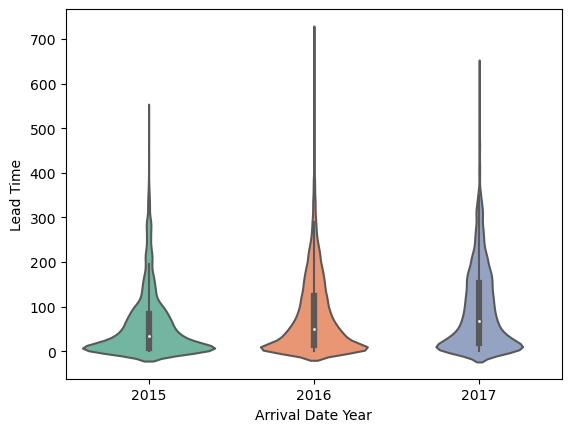

In [ ]:
sns.violinplot(data=df, x='Arrival Date Year', y='Lead Time', palette='Set2')
plt.show()

In [581]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Multivariate Lead Time & Average Daily Rate
def mv_lead_time_avg_dly_rate(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]

    fig = make_subplots(rows=1, cols=1)

    trace = go.Scatter(x=df_filtered[COL_NAME_LEAD_TIME], y=df_filtered[COL_NAME_AVG_DLY_RATE], 
                       mode='markers', marker=dict(opacity=.7))

    fig.add_trace(trace, row=1, col=1)

    fig.update_layout(xaxis_title=COL_NAME_LEAD_TIME,
                      yaxis_title=COL_NAME_AVG_DLY_RATE,
                      title=f'Scatter plot of {COL_NAME_LEAD_TIME} and {COL_NAME_AVG_DLY_RATE} by {desc} ({obj})',
                      showlegend=False,
                      height=500,
                      width=800,
                      hovermode='closest')

    fig.show()


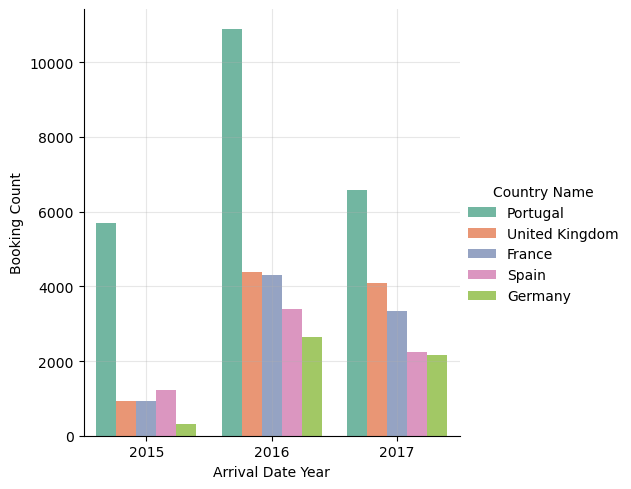

In [ ]:
sns.catplot(x=COL_NAME_ARR_DATE_Y,
            y='Booking Count',
            hue=COL_NAME_CNTRY_NAME,
            data=merged_df[merged_df[COL_NAME_CNTRY_NAME].isin(merged_df.groupby(COL_NAME_CNTRY_NAME).size().sort_values(ascending=False).head(5).index)][[COL_NAME_ARR_DATE_Y, COL_NAME_CNTRY_NAME]].groupby([COL_NAME_ARR_DATE_Y, COL_NAME_CNTRY_NAME]).size().sort_values(ascending=False).reset_index(name='Booking Count'),
            kind='bar',
            palette='Set2')
# plt.title(f'Top 10 Countries by booking count for each {COL_NAME_HTL} by {desc} ({obj})')
plt.grid(alpha=.3)
plt.show()

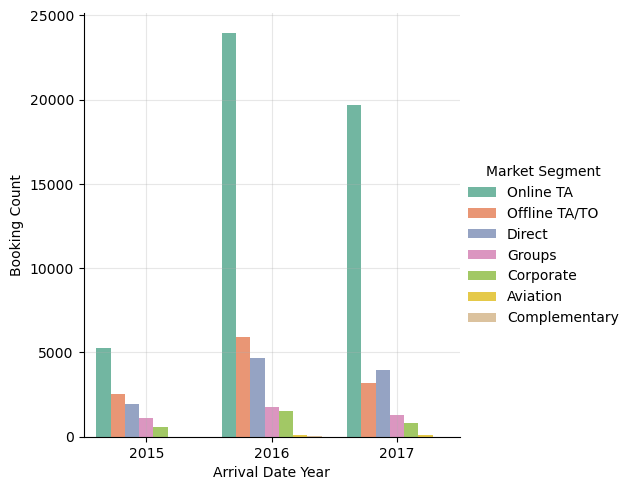

In [ ]:
sns.catplot(x=COL_NAME_ARR_DATE_Y,
            y='Booking Count',
            hue=COL_NAME_MKT_SEG,
            data=df.groupby([COL_NAME_ARR_DATE_Y, COL_NAME_MKT_SEG]).size().sort_values(ascending=False).reset_index(name='Booking Count'),
            kind='bar',
            palette='Set2')
# plt.title(f'Booking count of {COL_NAME_HTL} and {COL_NAME_MKT_SEG} by {desc} ({obj})')
plt.grid(alpha=.3)
plt.show()

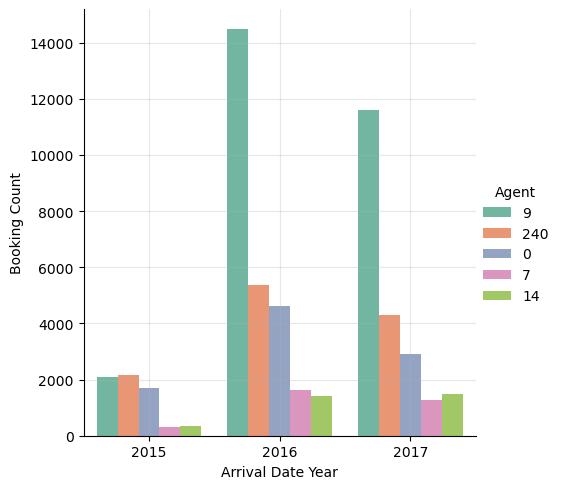

In [ ]:
sns.catplot(x=COL_NAME_ARR_DATE_Y,
            y='Booking Count',
            hue=COL_NAME_AGT,
            data=df[df[COL_NAME_AGT].isin(df.groupby(COL_NAME_AGT).size().sort_values(ascending=False).head(5).index)][[COL_NAME_ARR_DATE_Y, COL_NAME_AGT]].groupby([COL_NAME_ARR_DATE_Y, COL_NAME_AGT]).size().sort_values(ascending=False).reset_index(name='Booking Count'),
            kind='bar',
            palette='Set2')
# plt.title(f'Top 10 Countries by booking count for each {COL_NAME_HTL} by {desc} ({obj})')
plt.grid(alpha=.3)
plt.show()

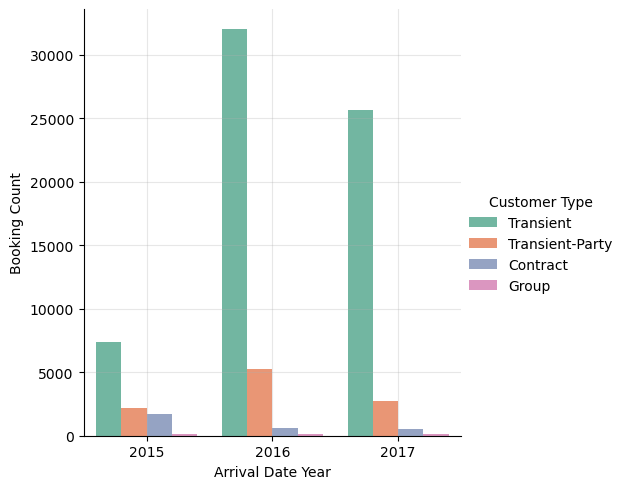

In [ ]:
sns.catplot(x=COL_NAME_ARR_DATE_Y,
            y='Booking Count',
            hue=COL_NAME_CUST_TYPE,
            data=df.groupby([COL_NAME_ARR_DATE_Y, COL_NAME_CUST_TYPE]).size().sort_values(ascending=False).reset_index(name='Booking Count'),
            kind='bar',
            palette='Set2')
# plt.title(f'Booking count of {COL_NAME_HTL} and {COL_NAME_MKT_SEG} by {desc} ({obj})')
plt.grid(alpha=.3)
plt.show()

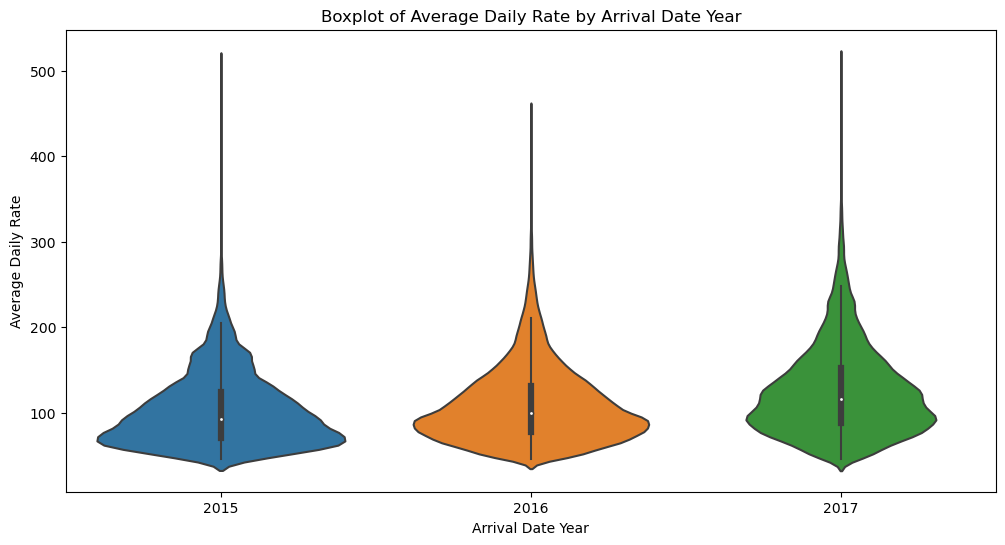

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Arrival Date Year', y='Average Daily Rate', data=df, order=[2015, 2016, 2017])
plt.title('Boxplot of Average Daily Rate by Arrival Date Year')
plt.show()


In [ ]:
import plotly.express as px
# Multivariate Hotel & Lead Time & Average Daily Rate
def mv_htl_lead_time_avg_dly_rate(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]

    fig = px.scatter(df_filtered, x=COL_NAME_LEAD_TIME, y=COL_NAME_AVG_DLY_RATE, color=COL_NAME_HTL,
                     title=f'Scatter plot of {COL_NAME_LEAD_TIME} and {COL_NAME_AVG_DLY_RATE} with {COL_NAME_HTL} by {desc} ({obj})',
                     hover_data=[COL_NAME_HTL])
    
    fig.update_layout(xaxis_title=COL_NAME_LEAD_TIME,
                      yaxis_title=COL_NAME_AVG_DLY_RATE)
    
    fig.show()
